In [1]:
from numpy import genfromtxt, pi, array
import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots
import os
import re
plt.style.use(['science'])

In [2]:
mpl.rcParams['text.latex.preamble'] = r'\boldmath'

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['xtick.direction'] = 'inout'

mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams['ytick.direction'] = 'inout'

mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['axes.labelweight'] = 'bold'

mpl.rcParams['figure.titlesize'] = 14

In [14]:
match = "^DEBCG_LS_H5_a54_NG"
nplanet = 2

In [15]:
path = r'Kepler80/Data/Code/'
file = r'/orbits.txt'
folders = os.listdir(path)
folders = sorted([folder for folder in folders if re.search(match, folder)])

In [16]:
folders

['DEBCG_LS_H5_a54_NG', 'DEBCG_LS_H5_a54_NG_f25', 'DEBCG_LS_H5_a54_NG_f50']

In [17]:
data = {folder: genfromtxt(path + folder + file, usecols=(0, 1, 2), unpack=True) for folder in folders}

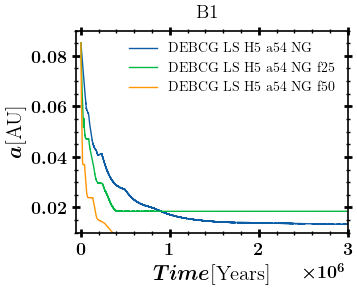

In [18]:
fig, ax = plt.subplots(1, 1)

for key, value in data.items():
    key = key.split('_')
    n = len(key[0])
    label = ' '.join(key)
    t, a, e = value
    ax.plot(t[::n]/2/pi, a[::n], label=label)

ax.set_ylabel(r'$a$[AU]')
ax.set_xlabel(r'$Time$[Years]')
ax.legend()
ax.set_ylim(0.01, 0.09)
ax.set_xlim(-0.05e6, 3e6)

fig.suptitle(r'B1')
# plt.savefig('B1.png', dpi=300)
plt.show()

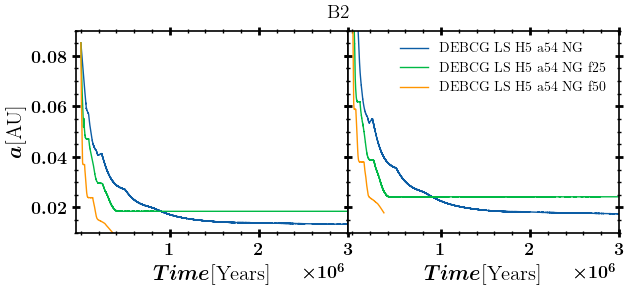

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=nplanet, figsize=(3.5 * nplanet, 2.625), sharey=True, sharex=True)
ticks = array((1, 2, 3)) * 1e6

for key, value in data.items():
    key = key.split('_')
    n = len(key[0])
    label = ' '.join(key)
    t, a, e = value
    for k in range(nplanet):
        ax[k].plot(t[k::n]/2/pi, a[k::n], label=label)
        ax[k].set_xlabel(r'$Time$[Years]')
        ax[k].set_xticks(ticks)

ax[0].set_ylabel(r'$a$[AU]')
ax[-1].legend()
ax[0].set_ylim(0.01, 0.09)
ax[0].set_xlim(-0.05e6, 3e6)

fig.suptitle(r'B2')
plt.subplots_adjust(wspace=0)
plt.savefig('B2.png', dpi=300)
plt.show() 

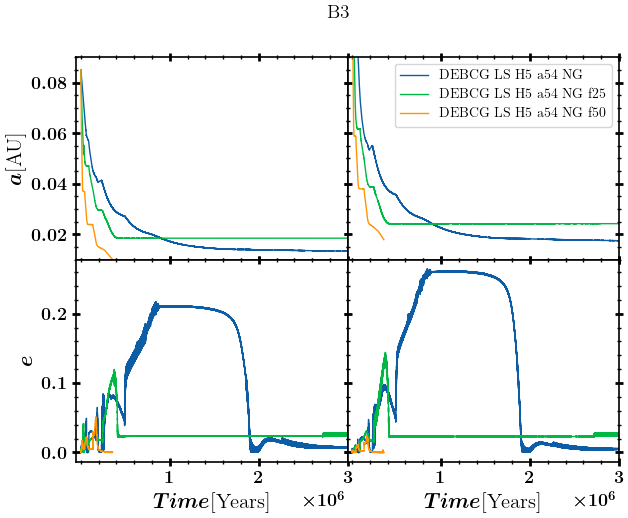

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=nplanet, figsize=(3.5 * nplanet, 2.625 * 2), sharey='row', sharex=True)
axticks = array((1, 2, 3)) * 1e6

for key, value in data.items():
    key = key.split('_')
    n = len(key[0])
    label = ' '.join(key)
    t, a, e = value
    for k in range(nplanet):
        ax[0][k].plot(t[k::n]/2/pi, a[k::n], label=label)
        ax[1][k].plot(t[k::n]/2/pi, e[k::n], label=label)
        ax[1][k].set_xlabel(r'$Time$[Years]')
        ax[0][k].set_xticks(axticks)

ax[0][0].set_ylabel(r'$a$[AU]')
ax[1][0].set_ylabel(r'$e$')
ax[0][-1].legend(frameon=True)
ax[0][0].set_ylim(0.01, 0.09)
ax[0][0].set_xlim(-0.05e6, 3e6)

fig.suptitle(r'B3')
plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig('B3.png', dpi=300)
plt.show() 

In [21]:
ax

array([<Axes: xlabel='$Time$[Years]', ylabel='$a$[AU]'>,
       <Axes: xlabel='$Time$[Years]'>], dtype=object)